### 数据挖掘流程

In [ ]:
1.数据读取
- 读取数据
- 统计指标
- 数据规模

2.数据探索（特征理解）
- 单特征的分析，逐个变量分析对结果y的影响（X和Y之间的相关性）
- 多变量分析（X和X之间的相关性）
- 统计绘图

3.数据清洗和预处理
- 缺失值填充
- 特征的标准化、归一化
- 特征工程（筛选有价值的特征）
- 分析特征之间的相关性

4.建立模型
- 特征数据和标签准备
- 数据集切分
- 多种模型对比：交叉验证、调参（学习曲线，网格搜索）
- 集成算法（提升算法） XGBoost、GBDT、light—GBM、神经网络（多种集成）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #画图的提升
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')


In [6]:
data=pd.read_csv('train.csv')

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.info() #object类型要处理，字符型数据没法计算

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
#看下数据描述
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:

#看下统计标签,看数据结构
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

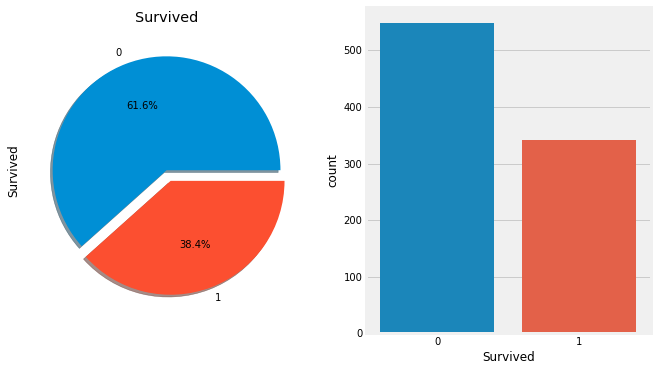

In [11]:
#看标签比例，获救比例
f,ax = plt.subplots(1,2,figsize=(10,6))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                        autopct='%1.1f%%',
                                        ax=ax[0],shadow=True)

ax[0].set_title('Survived') #添加标题

sns.countplot('Survived',data=data,ax=ax[1])


In [12]:
#统计不同性别下存活的比率，x与y的关系
#统计不同性别下存活的人数，x与y的关系 （简单做法，分类groupby求数量）
#groupby用的非常多
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

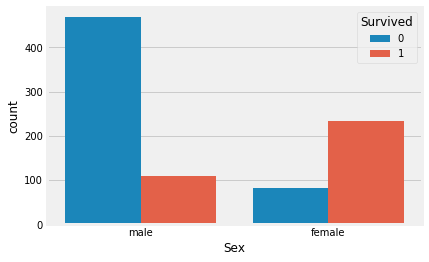

In [13]:
#组合柱状图，sns明显简单一些
sns.countplot('Sex',hue='Survived',data=data)

In [14]:
#Pclass船舱和获救之间的关系，交叉表
pd.crosstab(data.Pclass,data.Survived,
            margins=True).style.background_gradient(cmap='summer_r')

#margins=True，all计数

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [15]:

#解决方案中文乱码问题 
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文字体
plt.rcParams['axes.unicode_minus'] = False #设定正常显示字符

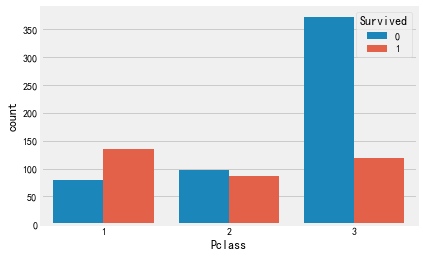

In [16]:
#组合柱状图，sns明显简单一些
sns.countplot('Pclass',hue='Survived',data=data)

In [17]:
#不同性别不同船舱，获救情况
pd.crosstab([data.Sex,data.Survived],
            data.Pclass,margins=True).style.background_gradient(cmap='spring_r')


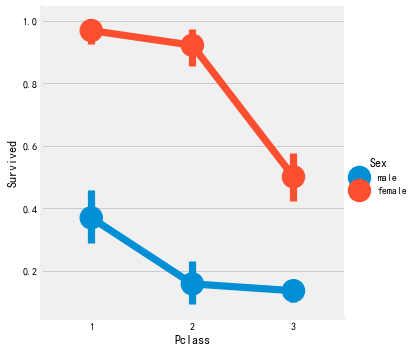

In [18]:
#看表不好看，看图，三个变量对比
sns.factorplot('Pclass','Survived',hue='Sex',data=data)

### 缺失值填充

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
data['initial'] = data.Name.str.extract('([A-Za-z]+)\.') #\.表示.结束
data['initial']
#initial 称谓

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: initial, Length: 891, dtype: object

In [21]:
pd.crosstab(data.initial,data.Sex).T
#维度压缩，数量大的一个维度，其他小的都压缩到一个维度

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [22]:
data.initial.values

array(['Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mrs',
       'Mrs', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mrs', 'Master', 'Mr',
       'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr',
       'Miss', 'Mr', 'Don', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr',
       'Miss', 'Miss', 'Mrs', 'Mrs', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr',
       'Miss', 'Mr', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr',
       'Miss', 'Mr', 'Miss', 'Master', 'Mr', 'Miss', 'Mr', 'Master', 'Mr',
       'Master', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr',
       'Mr', 'Mr', 'Mr', 'Mr', 'Master', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr',
       'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr',
       'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr',
       'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss',
       'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss',
       'Mr', 'Master', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr'

In [23]:
#维度压缩，数量大的一个维度，其他小的都压缩到一个维度
#用一个循环
re=[]
for i in data.initial.values:
    if i!='Master' and i!='Miss' and i!='Mr' and i!='Mrs':
        re.append(i.replace(i,'other'))
    else:
        re.append(i)

In [24]:
#把压缩后的列表赋值
data['re']=re
data.re.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'other'], dtype=object)

In [25]:
#看看计数
data.groupby('re')['Sex'].count()


re
Master     40
Miss      182
Mr        517
Mrs       125
other      27
Name: Sex, dtype: int64

In [26]:
#计算每一个称谓年龄的均值
data.groupby('re')['Age'].mean()


re
Master     4.574167
Miss      21.773973
Mr        32.368090
Mrs       35.898148
other     42.384615
Name: Age, dtype: float64

In [27]:
#master 小孩年龄平均值的整数
int(data.groupby('re')['Age'].mean()[0])

4

In [28]:
#筛选称谓的年龄为空值的情况，然后为它填充赋值
for i in data.re.values:
    data.loc[(data.Age.isnull())&(data.re==i),
             'Age']=int(data.groupby('re')['Age'].mean()[i]) #后面这个等号是赋值


In [29]:
data.Age.isnull().sum()
#返回0，表示缺失值填充已经完成

0

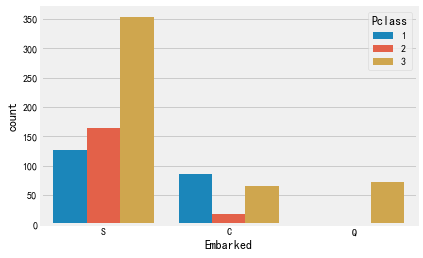

In [30]:
#对比不同港口对应的不同船舱等级
sns.countplot('Embarked',hue='Pclass',data=data)

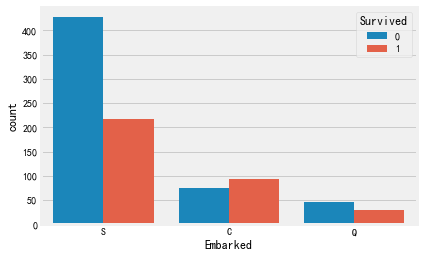

In [31]:
#对比不同港口的存活情况
sns.countplot('Embarked',hue='Survived',data=data)

In [32]:

data['Embarked'].isnull().sum()#有缺失值，缺失值较少，看数量，填众数

2

In [33]:
#填补缺失值
data['Embarked'].fillna('S',inplace=True)


In [34]:
data['Embarked'].isnull().sum()

0

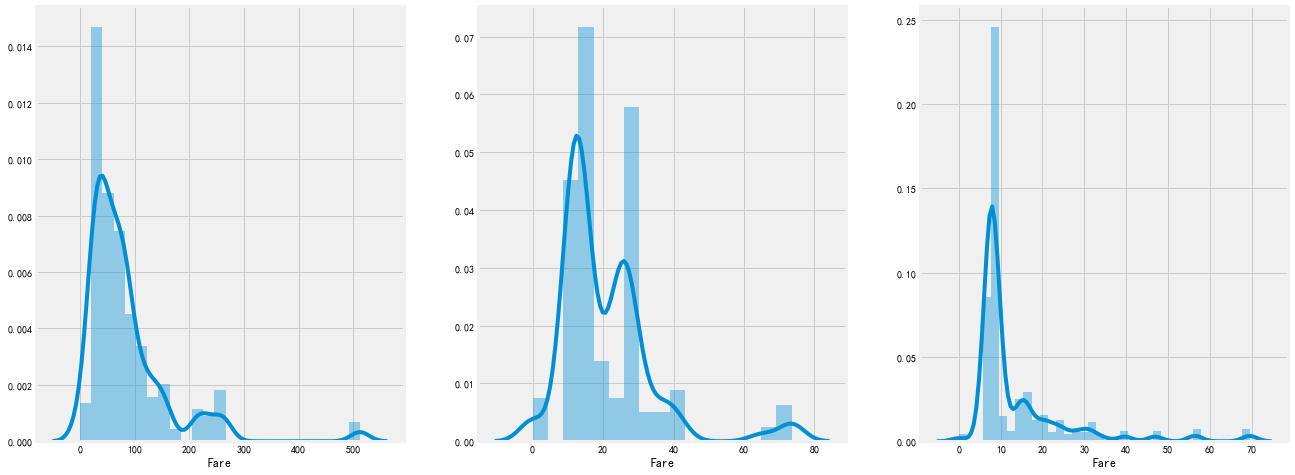

In [35]:
#看连续型变量分布情况Fare 票价,三个船舱
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])

In [36]:
#变量与变量之间关系，相关性检验

In [37]:
#相关性热图
data.corr() #corr相关系数

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.043358,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.089369,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.346011,0.083081,0.018443,-0.549500
Age,0.043358,-0.089369,-0.346011,1.000000,-0.268632,-0.195330,0.092215
SibSp,-0.057527,-0.035322,0.083081,-0.268632,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.195330,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.092215,0.159651,0.216225,1.000000


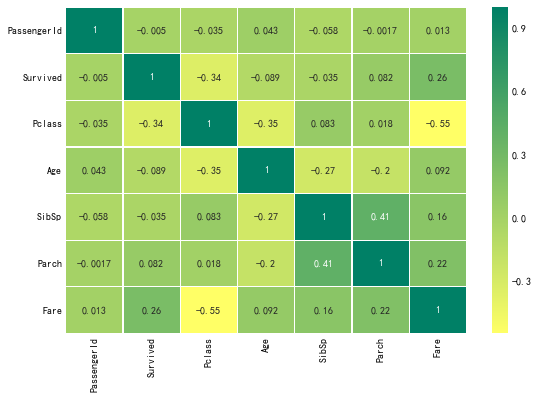

In [38]:
#相关性热图
sns.heatmap(data.corr(),annot=True,
            linewidths=0.2,cmap='summer_r')#annot=True 显示数据
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig('相关性热图.png')

In [39]:
#数据预处理
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr


In [40]:
#添加标签 把Age离散化，分箱为Age_band
data['Age_band']=0 
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=65),'Age_band']=3
data.loc[data['Age']>65,'Age_band']=4
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,2


In [41]:
from sklearn import preprocessing

In [42]:
#实例化，数值化
lbl = preprocessing.LabelEncoder()
data['Sex']=lbl.fit_transform(data['Sex'])
data['Embarked']=lbl.fit_transform(data['Embarked'])
data['re']=lbl.fit_transform(data['re'])


In [43]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,Mrs,3,2


In [44]:
data['Embarked'].unique()

array([2, 0, 1], dtype=int64)

In [45]:
#哑变量，归一化（用不热编码）
one_hot=preprocessing.OneHotEncoder(sparse=False)#实例化
#sparse=False表示没有进行升维
data['Embarked']=one_hot.fit_transform(data[['Embarked']])
#fit_transform(data[['Embarked']])规定fit后面数据必须是二维的，所以两个中括号

In [46]:
data.head(2) #re表示称谓

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,Mrs,3,2


In [47]:
#删除一些数据，对于建模没影响，或者影响不大的列
data.drop(['PassengerId','Name','Age','Ticket','Cabin','initial'],axis=1,
         inplace=True)


In [48]:
data.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,re,Age_band
0,0,3,1,1,0,7.2500,0.0,2,1
1,1,1,0,1,0,71.2833,1.0,3,2
2,1,3,0,0,0,7.9250,0.0,1,1


### 建模

In [49]:
from sklearn.neighbors import KNeighborsClassifier#KNN
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB 
#高斯贝叶斯，多项式贝叶斯，伯努利贝叶斯
from sklearn.linear_model import LogisticRegression,LinearRegression 
#逻辑回归，线性回归


In [50]:
#导入包
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


In [51]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,re,Age_band
0,0,3,1,1,0,7.2500,0.0,2,1
1,1,1,0,1,0,71.2833,1.0,3,2
2,1,3,0,0,0,7.9250,0.0,1,1
3,1,1,0,1,0,53.1000,0.0,3,2
4,0,3,1,0,0,8.0500,0.0,2,2


In [52]:
#帅选特征X和标签y
X = data.iloc[:,data.columns!='Survived']
y = data.iloc[:,data.columns=='Survived']


In [53]:
X.shape #891行，8个特征

(891, 8)

In [54]:
y.shape

(891, 1)

In [55]:
#划分数据集
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,
                                           random_state=10)


In [56]:
#逻辑回归
l=LogisticRegression()
l.fit(Xtrain,Ytrain)
l.score(Xtest,Ytest)

0.8100558659217877

In [57]:
#逻辑回归第二种写法
pred_1 = l.predict(Xtest)
metrics.accuracy_score(Ytest,pred_1)


0.8100558659217877

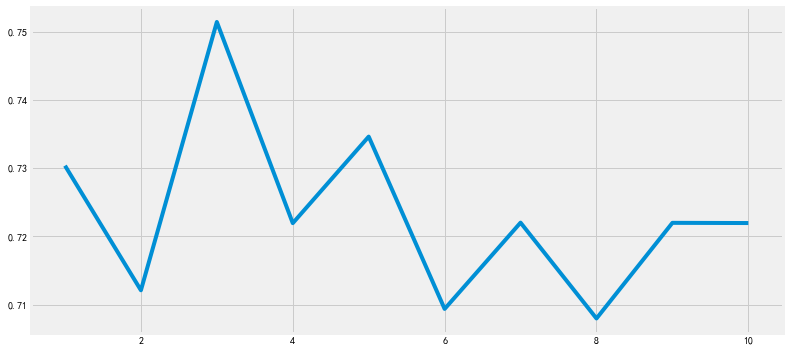

In [58]:
#KNN模型
score=[]
for i in list(range(1,11)):
    KNN = KNeighborsClassifier(n_neighbors=i)
    CVS = cross_val_score(KNN,Xtrain,Ytrain,cv=5)
    score.append(CVS.mean())
#画图
plt.plot([*range(1,11)],score)
fig = plt.gcf()
fig.set_size_inches(12,6)


In [59]:
max(score)#交叉验证求的均值，下面的KNN泛化能力比最大值大很正常

0.7514527725795331

In [60]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(Xtrain,Ytrain)
KNN.score(Xtest,Ytest)


0.7597765363128491

In [61]:
#决策树
#划分数据集
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,
                                           random_state=10)


In [64]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#DecisionTreeClassifier二分类决策树

In [65]:
clf = tree.DecisionTreeClassifier(criterion="gini")#criterion准则，表示特征选择
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度
score

0.7821229050279329

In [66]:
#朴素贝叶斯
#划分数据集
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,
                                           random_state=10)

In [67]:
#高斯朴素贝叶斯
gnb = GaussianNB().fit(Xtrain,Ytrain) #GaussianNB 高斯朴素贝叶斯简称gnb

#查看分数
acc_score = gnb.score(Xtest,Ytest)

acc_score

0.8044692737430168

In [68]:
#查看预测结果
Y_pred = gnb.predict(Xtest)
Y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [69]:
#查看预测的概率结果
prob = gnb.predict_proba(Xtest)

In [70]:
prob.shape

(179, 2)

In [71]:
#用混淆矩阵评估模型
from sklearn.metrics import confusion_matrix as CM
CM(Ytest,Y_pred)

array([[96, 21],
       [14, 48]], dtype=int64)

In [72]:
#多项式朴素⻉叶斯MultinomialNB
from sklearn.preprocessing import MinMaxScaler #归一化

In [73]:
#划分数据集
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,
                                           random_state=10)

In [74]:
#归一化，将数据改造，消除负数
#先归一化，保证输入多项式朴素贝叶斯的特征矩阵中不带有负数
mms = MinMaxScaler().fit(Xtrain)
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

In [75]:
#多项式贝叶斯，
mnb = MultinomialNB().fit(Xtrain_, Ytrain)

#重要属性：调用根据数据获取的，每个标签类的对数先验概率log(P(Y))
#由于概率永远是在[0,1]之间，因此对数先验概率返回的永远是负值

In [76]:
#下面的都是一些接口，看数据
mnb.score(Xtest_,Ytest)  #没有分箱之前，预测效果不好

0.7318435754189944

In [77]:
#可以使用np.exp来查看真正的概率值
np.exp(mnb.class_log_prior_)

array([0.60674157, 0.39325843])

In [78]:
#来试试看把Xtiain转换成分类型数据吧
#注意我们的Xtrain没有经过归一化，因为做哑变量之后自然所有的数据就不会又负数了
from sklearn.preprocessing import KBinsDiscretizer #分箱 kbs
kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)#n_bins=10分十个箱子
Xtrain_ = kbs.transform(Xtrain)
Xtest_ = kbs.transform(Xtest)

In [79]:
mnb = MultinomialNB().fit(Xtrain_, Ytrain)

mnb.score(Xtest_,Ytest) #分箱之后预测效果很好

0.8268156424581006

In [ ]:
#伯努利朴素贝叶斯，处理二值化的分类变量


In [ ]:
#划分数据集
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,
                                           random_state=10)

In [80]:
from sklearn.naive_bayes import BernoulliNB

#普通来说我们应该使用二值化的类sklearn.preprocessing.Binarizer来将特征一个个二值化
#然而这样效率过低，因此我们选择归一化之后直接设置一个阈值

mms = MinMaxScaler().fit(Xtrain)
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

In [81]:
#不设置二值化，没有二值化，还是连续变量，效果不好,
#这里数据例外，这种数据用决策树较好
bnl_ = BernoulliNB().fit(Xtrain_, Ytrain)
bnl_.score(Xtest_,Ytest)

0.8435754189944135

In [82]:
#设置二值化阈值为0.5
bnl = BernoulliNB(binarize=0.5).fit(Xtrain_, Ytrain)
bnl.score(Xtest_,Ytest)

0.8100558659217877

In [ ]:
#线性回归，这里没用，只是总结


In [ ]:
#划分数据集
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,
                                           random_state=10)

In [ ]:
#建模
reg= LR().fit(Xtrain,Ytrain) #reg回归
reg.score(Xtest,Ytest) #回归的score没意义，用R方代替

In [ ]:
#岭回归：解决多重线性问题
reg=Ridge(alpha=1).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)#Ridge岭回归，这个只是解决模型漏洞，并不能提高预测

In [ ]:
#lasso回归

In [ ]:
#划分数据集
Xtrain,Xtest,Ytrain,Ytest=TTS(X,y,test_size=0.3,random_state=420)


In [ ]:
l2 = Lasso(alpha=1).fit(Xtrain,Ytrain)
(l.coef_*100).tolist()
#但L1正则化主导稀疏性，因此会将系数压缩到0。这个性质，让Lasso成为了线性模型中的特征
#选择⼯具⾸选

In [ ]:
#kmeans算法也不会用到这里，在此就不总结了
#注意泰坦尼克号数据一般用决策树，（逻辑回归，KNN，这些少用）

### 网格搜索

In [57]:
from sklearn.model_selection import GridSearchCV


In [58]:
# 设置可选参数
param_grid = {'criterion':['entropy','gini'],
             'max_depth':range(2,10),
             'min_samples_leaf':range(1,10),
             'min_samples_split':range(2,10)}
# 设置网格
GR = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

# 建模
GR.fit(Xtrain,Ytrain)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': range(2, 10), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
#输出接口
GR.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 4}

In [60]:
#训练集最优的分数
GR.best_score_

0.8300561797752809

In [ ]:
#上模型
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=8,
                            min_samples_leaf=5,min_samples_split=4).fit(Xtrain,Ytrain)
DTC.score(Xtest,Ytest)

In [ ]:
DTC.feature_importances_

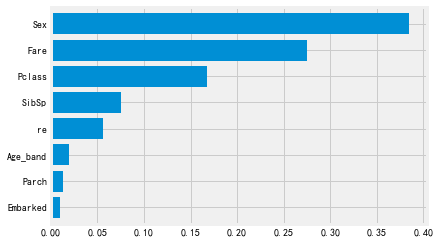

In [63]:
f = plt.figure(figsize=(6,4))
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=8,
                            min_samples_leaf=5,min_samples_split=4).fit(Xtrain,Ytrain)

pd.Series(DTC.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)


In [ ]:
#到这就差不多可以了，当然也可以在做下去

### 画一个ROC曲线

In [64]:
y_pred = DTC.predict(Xtest)

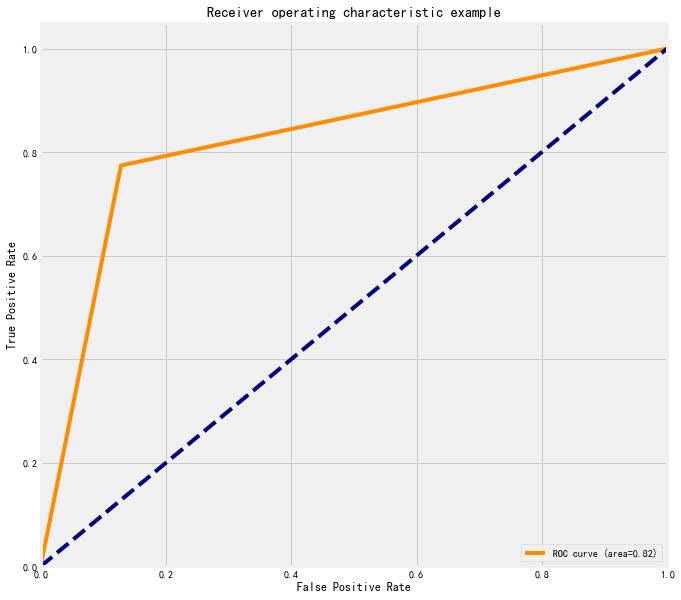

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_curve,auc # 计算roc和auc
#计算真正率tpr和假正率fpr
fpr,tpr,threshold = roc_curve(Ytest,y_pred)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',
        label = 'ROC curve (area=%0.2f)'% roc_auc) # 假正率是横坐标，真正率是纵坐标

plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')


### 混淆矩阵，看看测试集的预测

In [68]:
from sklearn.model_selection import cross_val_predict


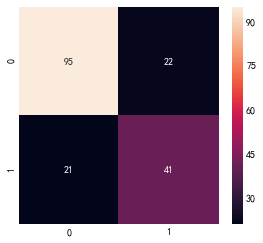

In [69]:
plt.figure(figsize=(4,4))
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(Xtrain,Ytrain)
y_pred =KNN.predict(Xtest)
sns.heatmap(confusion_matrix(Ytest,y_pred),annot=True,fmt='2.0f')


### 预习下 集成算法

In [ ]:
from sklearn.ensemble import BaggingClassifier #集成分类

In [ ]:
model = BaggingClassifier(base_estimator=DTC,
                         n_estimators=700,
                         random_state=0)
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

In [ ]:
#下面的是老师课件上简单处理泰坦尼克号的代码

### 对数据集进⾏不涉及到训练集和测试集之间相互影响的预处理

In [42]:
#删除缺失值过多的列，和观察判断来说和预测的y没有关系的列
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1) 
#将分类变量转换为数值型变量
#将⼆分类变量转换为数值型变量
#astype能够将⼀个pandas对象转换为某种类型，
#和apply(int(x))不同，astype可以将⽂本类转换为
#数字，⽤这个⽅式可以很便捷地将⼆分类特征转换为0~1
data["Sex"] = (data["Sex"]== "male").astype("int") #将三分类变量转换为数值型变量
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

In [43]:
#查看处理后的数据集
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


###  提取标签和特征矩阵，分测试集和训练集

In [44]:
#进⾏涉及到训练集和测试集的预处理：
X = data.iloc[:,data.columns != "Survived"] 
y = data.iloc[:,data.columns == "Survived"]
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3
 ,random_state=420)

In [45]:
#处理缺失值，对缺失值较多的列进⾏填补
Xtrain.loc[:,"Age"] = Xtrain.Age.fillna(Xtrain["Age"].mean())
Xtest.loc[:,"Age"] = Xtest.Age.fillna(Xtrain["Age"].mean())

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [46]:
#有⼀些特征只有⼀两个值，可以采取直接删除记录的⽅法
Xtrain = Xtrain.dropna()

In [47]:
#查看分好的训练集和测试集
Xtrain.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
418,419,2,1,30.000000,0,0,13.0000,0
814,815,3,1,30.500000,0,0,8.0500,0
65,66,3,1,29.100895,1,1,15.2458,1
749,750,3,1,31.000000,0,0,7.7500,2
157,158,3,1,30.000000,0,0,8.0500,0


### 导⼊模型，粗略跑⼀下查看结果

In [48]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)
score_
score = cross_val_score(clf,Xtrain,Ytrain,cv=10).mean()
score
var = cross_val_score(clf,Xtrain,Ytrain,cv=10).var()
var

0.0028046394277989545

### 在不同max_depth下观察模型的拟合状况

0.8139648937532001


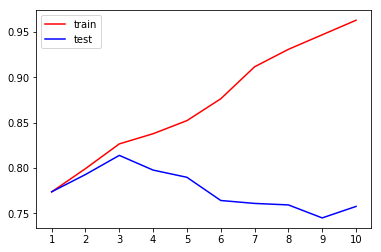

In [49]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25,max_depth=i+1 )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,Xtrain,Ytrain,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

### ⽤⽹格搜索调整参数

In [50]:
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)
parameters = {'splitter':('best','random')
 ,'criterion':("gini","entropy")
 ,"max_depth":[*range(1,10)]
 ,'min_samples_leaf':[*range(1,50,5)]
 ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
 }


In [51]:
#======【TIME WARNING：2mins 30s】======#
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

KeyboardInterrupt: 

In [ ]:
#属性best_params_查看调整出来的最佳参数
GS.best_params_

In [ ]:
#属性best_score_查看最佳分数
GS.best_score_